In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Cargar el conjunto de datos
beisbol_data = pd.read_csv(r'C:\Users\Diego\OneDrive\Escritorio\DatosEvaluacion\beisbol.csv')


In [3]:
# Codificar la columna 'equipos' usando one-hot encoding
beisbol_data = pd.get_dummies(beisbol_data, columns=['equipos'], drop_first=True)


In [4]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = beisbol_data.drop('runs', axis=1)
y = beisbol_data['runs']

In [5]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Crear y entrenar el modelo de regresión Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)


Ridge()

In [7]:
# Realizar predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test)


In [8]:
# Evaluar el modelo sin ajuste de hiperparámetros
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

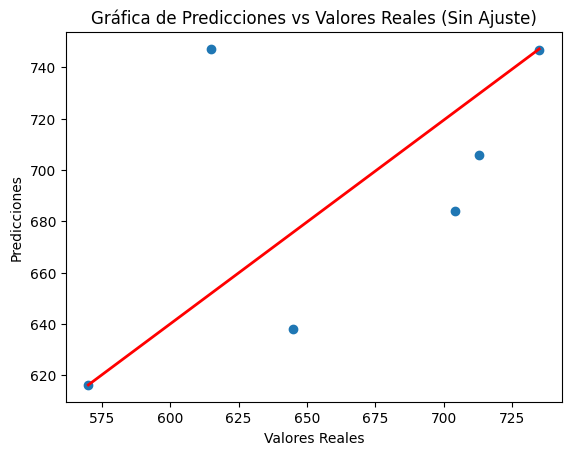

In [9]:
# Crear una gráfica de dispersión y línea de regresión para el modelo sin ajuste de hiperparámetros
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales (Sin Ajuste)')
plt.show()

In [23]:
# Imprimir resultados del modelo sin ajuste de hiperparámetros
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 3372.006810536046
Coeficiente de determinación (R²): 0.019733799708504418


In [38]:
# Definir los valores de los hiperparámetros que deseas probar
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de regularización (alpha)
    'fit_intercept': [True, False]
}

In [39]:
# Escalar los datos para Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
# Crear el modelo de regresión Ridge
ridge_model = Ridge()

In [41]:
# Crear un objeto GridSearchCV con el modelo, la cuadrícula de hiperparámetros y la métrica a optimizar (por ejemplo, MSE)
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)


In [42]:
# Ajustar el objeto GridSearchCV a tus datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [43]:
# Obtener los mejores hiperparámetros y la mejor puntuación
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  


In [44]:
# Crear un nuevo modelo de regresión Ridge con los mejores hiperparámetros encontrados
best_ridge_model = Ridge(**best_params)

In [45]:
# Entrenar el modelo con los datos de entrenamiento escalados
best_ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [46]:
# Realizar predicciones en el conjunto de prueba escalado
y_pred_best = best_ridge_model.predict(X_test_scaled)


In [47]:
# Evaluar el modelo con los mejores hiperparámetros
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

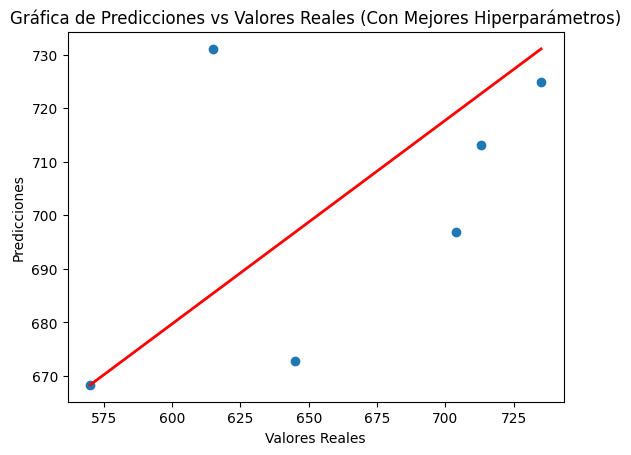

In [48]:
# Crear una gráfica de dispersión y línea de regresión para el modelo con mejores hiperparámetros
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_pred_best), max(y_pred_best)], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfica de Predicciones vs Valores Reales (Con Mejores Hiperparámetros)')
plt.show()

In [49]:
# Imprimir resultados del modelo con mejores hiperparámetros
print("Error cuadrático medio (MSE) con mejores hiperparámetros:", mse_best)
print("Coeficiente de determinación (R²) con mejores hiperparámetros:", r2_best)

Error cuadrático medio (MSE) con mejores hiperparámetros: 4010.3244795703845
Coeficiente de determinación (R²) con mejores hiperparámetros: -0.16582965587174825
